In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../../dados_harmonicos.csv')
df = df.replace('i', 'j', regex=True)

display(df)

,Amostras_1,Amostras_2,Amostras_3,Amostras_4,Amostras_5,Amostras_6,Amostras_7,Amostras_8,Amostras_9,Amostras_10,...,Amostras_497,Amostras_498,Amostras_499,Amostras_500,classe,Freq_analisada_Hz,Faixa_Moduladora,Intensidade_db,Canal,voluntario
0,-11.9287104248694-14.875441163193j,-2.63714438278631-14.1628903301632j,9.73905140697886-4.24308876347259j,-3.43817508699753-2.8378860807684j,0.938320862758085+5.95107087382504j,8.34466503900969+1.6684502012175j,8.77886551905124+8.3157768855802j,10.9624002530382+2.01821508312438j,4.19255303664547+5.1380440057899j,8.489090178271+12.2496259592486j,...,-28.9453463142943-21.6304959537416j,-9.19706269084625-4.7768259353937j,9.01423925727307-10.1986834977578j,10.8333209474169+4.1303505528859j,1,33,40,70,Fz,AH
1,5.66665098295756-5.73863696753984j,9.34414941536059-5.20427593084129j,3.3898302601677-11.5270457678019j,3.14738280266078-2.34459462857865j,-7.21764374881923-6.31323753300691j,9.47886518313603+0.200072129045863j,5.08831951684019-5.29782869354779j,16.7717167465448+5.85075431837294j,5.21140736817612-2.50991292686624j,-8.31799871316987-1.95038263571372j,...,-7.77465828570368+6.67007688514336j,-16.3066217132743-1.33421106945253j,15.7168302816696+1.66835119876892j,-8.22206670206577+9.88365693946781j,1,37,40,70,Fz,AH
2,5.03028213137088+3.47361196230173j,-8.13721439651841-1.54700800702243j,-3.49032348809159-6.66477217226851j,-6.31856869684226+1.36460382685254j,-5.21954769011709+1.91627182728754j,10.3586555260325+19.1357487143088j,-3.45204256695516+0.342587220032595j,6.42602420941557+10.2961333905352j,0.497455231380335+3.93198354291971j,8.29572494083051-6.29351136704858j,...,-0.702039368136772-6.47090923634808j,-1.90915569723743+0.038460878155894j,1.87654516838996-3.85444284179093j,-2.53931374086284-8.18505752611262j,1,41,40,70,Fz,AH
3,-2.69437552533651-0.443265571662665j,2.26297505445924-4.32979978993325j,0.878647306471491-1.96030684712897j,11.0077443304137-2.79243994148609j,-14.5506837064631-9.21217511179037j,-1.65928041963358+4.1664351549347j,3.03285429976141-4.5718040583682j,-5.50383427622592+1.18211072326647j,-2.64321560104519+2.31977905364747j,5.15143673656233+7.14796532809706j,...,3.98637655597113+9.47765688816421j,0.997033700699956-9.35423387583864j,-3.36588504598374-9.64001409114187j,1.16062075000301+13.1098799183474j,1,45,40,70,Fz,AH
4,-14.1060396536154-11.9635989992521j,-3.09273257435156-10.5939169051076j,15.1230979200572+9.05970772430038j,-2.7337558296306+11.6971923757082j,-8.03980363779999+4.43023371717983j,-0.446586928611119+2.3003852581034j,5.90963584175537+11.5878523587431j,-5.90589543505183-1.89264297146193j,-5.75710935013775-5.63953389646059j,15.9100049379377+6.03935321543916j,...,-2.7319403539445+0.311077933404636j,-2.75289128653264+7.35270460275029j,17.2120994723809-1.01519107216341j,-12.9170268288462+11.2994210537745j,1,35,40,70,Fz,AH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36427,-5.0737071078554+1.72032679863412j,-0.539014605864759+1.13637855546732j,4.13394660971259-0.138121388105622j,0.0313869559904948+0.310068736168884j,-3.24802527160743+1.4843660946957j,-1.68868362385994-1.48842940293941j,0.700522770778116-2.55405315706674j,-2.66176964421405-0.167157805304496j,-3.25245856858173+2.73398824154305j,2.32907354506859+1.96572310510385j,...,-0.195726602914531-0.174706686339984j,-0.722504066147478+0.00398305279170432j,-0.0934224841023479+0.596997412630031j,0.571885192143587-0.273779896160786j,0,284,80,50,C3,YR
36428,3.08737719393949-2.69755920894245j,1.97713064063035+3.4079467878609j,2.45590484073787+0.724865368786072j,2.96780453021556-1.96561114905103j,-0.391357237599486+4.65686204955065j,1.78029898455087+0.116326747583786j,-2.70977016203882-3.66628566122578j,-4.12623933258891-2.02591968790311j,-0.476559332641357+3.07327262220186j,1.31973739251342-0.270895442890474j,...,0.180166776142092-0.330668674518849j,-1.1444534466246-0.0130871484248901j,-0.210670280029139+0.218867741252382j,-0.418698984960838+0.858802784956105j,0,288,80,50,C3

In [5]:
df.classe.value_counts()

classe
0    27984
1     8448
Name: count, dtype: int64

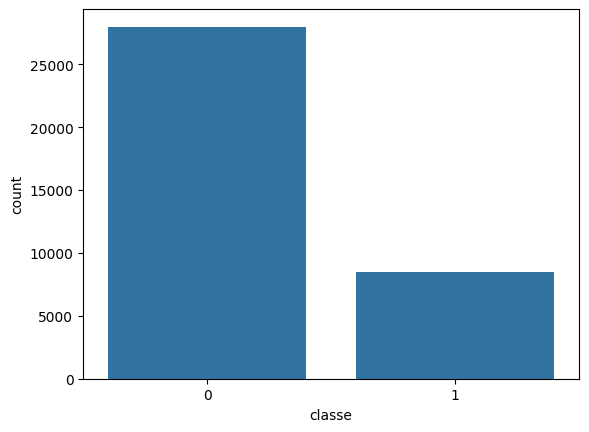

In [6]:
import seaborn as sns

ax = sns.countplot(x='classe', data=df)

In [7]:
y = df['classe']

In [8]:
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
36427    0
36428    0
36429    0
36430    0
36431    0
Name: classe, Length: 36432, dtype: int64


In [9]:
X = df.drop(['classe', 
             'Freq_analisada_Hz', 
             'Faixa_Moduladora', 
             'Intensidade_db', 
             'Canal', 
             'voluntario'], axis=1)


In [10]:
X.columns = range(X.shape[1]) #Remove o Header

In [11]:
complex_columns = X.columns
X[complex_columns] = X[complex_columns].map(lambda x: complex(x))

In [13]:
X

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,-11.928710-14.875441j,-2.637144-14.162890j,9.739051- 4.243089j,-3.438175- 2.837886j,0.938321+ 5.951071j,8.344665+ 1.668450j,8.778866+ 8.315777j,10.962400+ 2.018215j,4.192553+ 5.138044j,8.489090+12.249626j,...,10.762492- 6.025673j,-1.632676+ 1.225097j,-7.596579-16.103768j,-0.216726+ 0.316262j,25.630336-14.919646j,-2.060430+ 5.308544j,-28.945346-21.630496j,-9.197063- 4.776826j,9.014239-10.198683j,10.833321+ 4.130351j
1,5.666651- 5.738637j,9.344149- 5.204276j,3.389830-11.527046j,3.147383- 2.344595j,-7.217644- 6.313238j,9.478865+ 0.200072j,5.088320- 5.297829j,16.771717+ 5.850754j,5.211407- 2.509913j,-8.317999- 1.950383j,...,8.077006- 2.450638j,5.536716- 2.674598j,3.220150+ 7.451692j,-2.781569+ 0.794667j,-14.826070+ 2.844775j,-0.353782-11.203817j,-7.774658+ 6.670077j,-16.306622- 1.334211j,15.716830+ 1.668351j,-8.222067+ 9.883657j
2,5.030282+ 3.473612j,-8.137214- 1.547008j,-3.490323- 6.664772j,-6.318569+ 1.364604j,-5.219548+ 1.916272j,10.358656+19.135749j,-3.452043+ 0.342587j,6.426024+10.296133j,0.497455+ 3.931984j,8.295725- 6.293511j,...,-10.415713+ 2.694269j,-6.855254+ 6.386199j,-7.431757- 0.079620j,0.070872- 0.886761j,3.447768-17.123976j,-1.250024- 7.113759j,-0.702039- 6.470909j,-1.909156+ 0.038461j,1.876545- 3.854443j,-2.539314- 8.185058j
3,-2.694376- 0.443266j,2.262975- 4.329800j,0.878647- 1.960307j,11.007744- 2.792440j,-14.550684- 9.212175j,-1.659280+ 4.166435j,3.032854- 4.571804j,-5.503834+ 1.182111j,-2.643216+ 2.319779j,5.151437+ 7.147965j,...,-3.950999- 9.946862j,9.725179-13.849486j,5.468995+ 7.816748j,19.021305- 3.194024j,-0.096165- 3.278488j,4.711426- 5.753388j,3.986377+ 9.477657j,0.997034- 9.354234j,-3.365885- 9.640014j,1.160621+13.109880j
4,-14.106040-11.963599j,-3.092733-10.593917j,15.123098+ 9.059708j,-2.733756+11.697192j,-8.039804+ 4.430234j,-0.446587+ 2.300385j,5.909636+11.587852j,-5.905895- 1.892643j,-5.757109- 5.639534j,15.910005+ 6.039353j,...,2.340203+ 8.537311j,-2.441823+16.152369j,-7.452733+13.236527j,-1.475344-10.116503j,-16.804818- 2.406014j,5.356770- 4.615183j,-2.731940+ 0.311078j,-2.752891+ 7.352705j,17.212099- 1.015191j,-12.917027+11.299421j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36427,-5.073707+ 1.720327j,-0.539015+ 1.136379j,4.133947- 0.138121j,0.031387+ 0.310069j,-3.248025+ 1.484366j,-1.688684- 1.488429j,0.700523- 2.554053j,-2.661770- 0.167158j,-3.252459+ 2.733988j,2.329074+ 1.965723j,...,0.575891+ 0.780205j,1.279807+ 0.040812j,0.337976+ 0.160662j,0.264041- 0.074460j,-0.234652- 0.600274j,-0.245580- 0.962888j,-0.195727- 0.174707j,-0.722504+ 0.003983j,-0.093422+ 0.596997j,0.571885- 0.273780j
36428,3.087377- 2.697559j,1.977131+ 3.407947j,2.455905+ 0.724865j,2.967805- 1.965611j,-0.391357+ 4.656862j,1.780299+ 0.116327j,-2.709770- 3.666286j,-4.126239- 2.025920j,-0.476559+ 3.073273j,1.319737- 0.270895j,...,-0.489615+ 0.646289j,-0.090216+ 0.712684j,0.953904- 0.704390j,-0.041782- 0.805774j,-0.234882- 0.420509j,-0.349412- 0.034595j,0.180167- 0.330669j,-1.144453- 0.013087j,-0.210670+ 0.218868j,-0.418699+ 0.858803j
36429,-1.094673- 3.423386j,-0.542580+ 3.539838j,2.670445- 2.039099j,-1.178295- 2.948612j,-0.427241+ 0.526579j,2.590145- 0.248216j,-1.459312- 6.040079j,-2.248240- 0.116282j,0.189199+ 2.742862j,1.093336- 0.084467j,...,1.386498+ 1.414950j,1.192650+ 0.413130j,0.979727- 0.849478j,0.686789- 0.798795j,0.106110- 0.721983j,-0.970842- 1.030110j,-0.309825+ 0.544638j,-0.570013+ 0.259579j,-0.557830+ 0.692069j,0.550752+ 0.561461j
36430,-3.949760- 3.252371j,1.161190+ 6.647882j,2.483743- 7.054851j,-1.516412- 0.584239j,0.204257+ 3.016372j,6.641242+ 0.717916j,2.341137- 2.642991j,-2.516221- 0.891448j,-0.525792+ 5.192359j,3.493945+ 3.022651j,...,1.528899+ 2.438920j,1.912761+ 1.166544j,1.891412- 0.765053j,0.604001- 2.148495j,-1.254745- 1.910465j,-0.426792- 1.179144j,-2.051223- 0.715867j,-1.064053+ 0.889902j,-1.015930+ 1.574749j,-0.425524+ 0.499115j


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y)


In [16]:
X_train_rec = X_train.copy()
X_train = np.abs(X_train)

X_test_rec = X_test.copy()
X_test = np.abs(X_test)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### SVM

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.05, 0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf', 'poly']
}

model_svm = SVC(max_iter=300)

grid_svm = GridSearchCV(model_svm, param_grid, cv=10, scoring='roc_auc')

grid_svm.fit(X_train, y_train)

c:\Users\NEPS\Desktop\Jeisiany\Metodos Classicos\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\NEPS\Desktop\Jeisiany\Metodos Classicos\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\NEPS\Desktop\Jeisiany\Metodos Classicos\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\NEPS\Desktop\Jeisiany\Metodos Classicos\.venv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users

GridSearchCV(cv=10, estimator=SVC(max_iter=300),
             param_grid={'C': [0.01, 0.05, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='roc_auc')

In [20]:
best_params_svm = grid_svm.best_params_
best_score_svm = grid_svm.best_score_

In [22]:
print(best_params_svm)
print(best_score_svm)

{'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
0.6375938103220107


In [21]:
final_model_svm = SVC(
    C= best_params_svm['C'],
    kernel= best_params_svm['kernel'],
    gamma= best_params_svm['gamma']
)

final_model_svm.fit(X_train, y_train)

SVC(C=0.01, gamma=0.0001)

In [23]:
from sklearn import metrics

y_pred = final_model_svm.predict(X_test)

acc_svm = metrics.accuracy_score(y_test, y_pred)

print(acc_svm)

0.7680801427199122


In [24]:
print(pd.crosstab(y_test,y_pred, rownames=['Real'], colnames=['Previsão'], margins=True),'')

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

print(cm)

Previsão     0   All
Real                
0         5597  5597
1         1690  1690
All       7287  7287 
[[5597    0]
 [1690    0]]


In [25]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.5

In [26]:
from sklearn.metrics import roc_curve

fpr_rna, tpr_rna, threshold = roc_curve(y_test, y_pred)

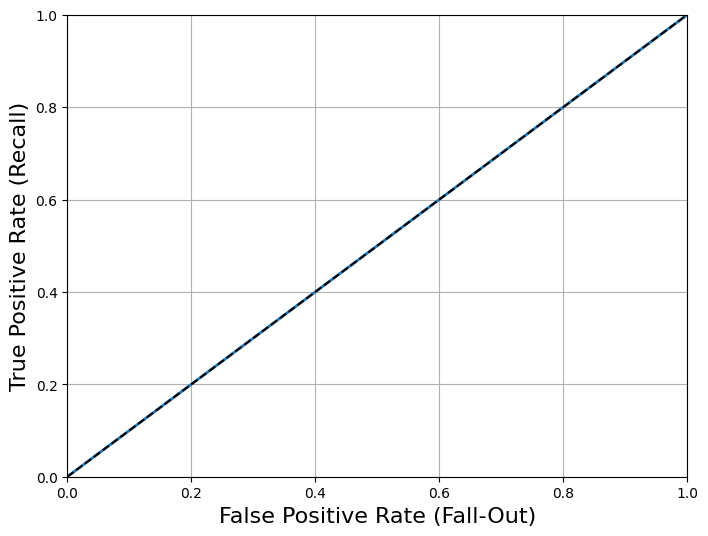

In [27]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_rna, tpr_rna)
#fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
#plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
#plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
#plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
plt.show()

### SGD

In [29]:
from sklearn.linear_model import SGDClassifier


param_grid_sgd = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 20, 100],
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],

}

model_sgd = SGDClassifier(max_iter=300)

grid_sgd = GridSearchCV(model_sgd, param_grid_sgd, cv=10, scoring='roc_auc')
grid_sgd.fit(X_train, y_train)

c:\Users\NEPS\Desktop\Jeisiany\Metodos Classicos\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\NEPS\Desktop\Jeisiany\Metodos Classicos\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\NEPS\Desktop\Jeisiany\Metodos Classicos\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\NEPS\Desktop\Jeisiany\Metodos Classicos\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consid

GridSearchCV(cv=10, estimator=SGDClassifier(max_iter=300),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 20, 100],
                         'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron']},
             scoring='roc_auc')

In [30]:
best_params_sgd = grid_sgd.best_params_
best_score_sgd = grid_sgd.best_score_

In [31]:
print(best_params_sgd)
print(best_score_sgd)

{'alpha': 0.1, 'loss': 'modified_huber'}
0.6540105346785714


In [34]:
final_model_sgd = SGDClassifier(
    alpha= best_params_sgd['alpha'],
    loss= best_params_sgd['loss'],
)

final_model_sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.1, loss='modified_huber')

In [36]:
from sklearn import metrics

y_pred_sgd = final_model_sgd.predict(X_test)

acc_sgd = metrics.accuracy_score(y_test, y_pred_sgd)

print(acc_sgd)

0.7680801427199122


In [37]:
print(pd.crosstab(y_test,y_pred_sgd, rownames=['Real'], colnames=['Previsão'], margins=True),'')

from sklearn.metrics import confusion_matrix

cm_sgd = confusion_matrix(y_test,y_pred_sgd)

print(cm_sgd)

Previsão     0   All
Real                
0         5597  5597
1         1690  1690
All       7287  7287 
[[5597    0]
 [1690    0]]


In [79]:
y_proba = final_model_sgd.predict_proba(X_test)

y_proba

array([[0.74238282, 0.25761718],
       [0.68022136, 0.31977864],
       [0.70411054, 0.29588946],
       ...,
       [0.9481393 , 0.0518607 ],
       [0.84114278, 0.15885722],
       [0.80233198, 0.19766802]])

In [80]:
limiar = 0.9897
y_pred_limiar = (y_proba[:,1] > limiar)

y_pred_limiar = np.multiply(y_pred_limiar, 1)

y_pred_limiar

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_limiar).ravel()

taxa_fp = fp/(tn+fp)
taxa_detec_limiar = tp/(tp+fp)

print(pd.crosstab(y_test,y_pred_limiar, rownames=['Real'], colnames=['Previsão'], margins=True),'')
print('-------')
print(taxa_fp)
print(taxa_detec_limiar)

Previsão     0   All
Real                
0         5597  5597
1         1690  1690
All       7287  7287 
-------
0.0
nan


C:\Users\NEPS\AppData\Local\Temp\ipykernel_20080\2926405905.py:4: RuntimeWarning: invalid value encountered in scalar divide
  taxa_detec_limiar = tp/(tp+fp)


In [82]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_proba[:,1])

0.6506492806268785

In [83]:
from sklearn.metrics import roc_curve

fpr_rna, tpr_rna, threshold = roc_curve(y_test, y_proba[:,1])

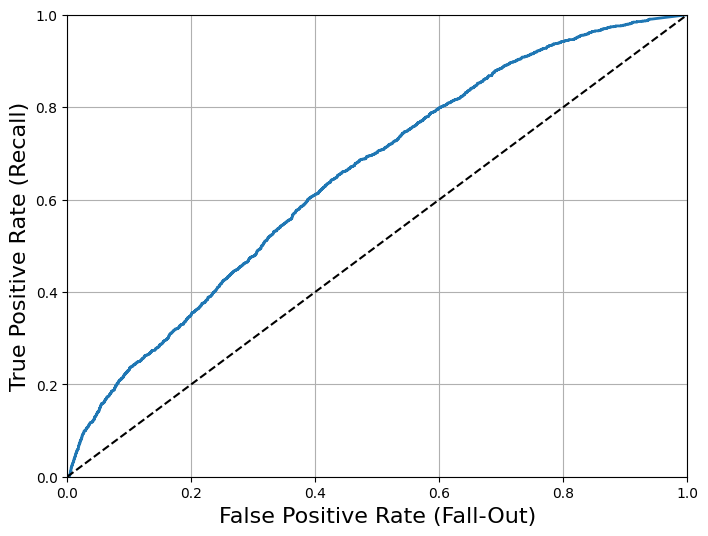

In [84]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_rna, tpr_rna)
#fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
#plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
#plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
#plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
plt.show()

### SGD Sem Harmonicos

In [43]:
df_no_harm = pd.read_csv('../../RNA/dataset.csv')
df_no_harm = df.replace('i', 'j', regex=True)

display(df_no_harm)

,Amostras_1,Amostras_2,Amostras_3,Amostras_4,Amostras_5,Amostras_6,Amostras_7,Amostras_8,Amostras_9,Amostras_10,...,Amostras_497,Amostras_498,Amostras_499,Amostras_500,classe,Freq_analisada_Hz,Faixa_Moduladora,Intensidade_db,Canal,voluntario
0,-61.4675405005614-17.6773340689724i,57.7820836617663-33.4980638648694i,-61.6787935683748+11.7049399839918i,18.3417046154271+29.1262283511643i,-12.2085951503144+21.3109232607936i,7.42551598241875+48.4326515892766i,32.9156290840989+63.455622896587i,-7.42238067464719+39.5270398576069i,23.5969306957763+28.35097825793i,-11.2427958805275+19.8616124567622i,...,-3.97670723228159-0.405765693104422i,1.33862432392123-0.63292655864697i,4.19725555304138+0.123854425732815i,-2.68716302688221+2.2040661485089i,1,8,18,7,0F,7A
1,-54.8385006061307-22.4188460653983i,-79.8684844267592-13.7029197558928i,-14.3037039561763-31.0885849197102i,-5.58461041689541+40.7382162102342i,19.5896178837464+49.8981258863485i,15.9654106636583-35.9101593049934i,9.07310970561626-33.0916117563951i,-16.4546104393262+3.92120096592536i,4.67509500453922+4.91090318774199i,15.8016565000346-50.7898805903177i,...,-3.31554496594703-5.43572222908025i,-3.73518632553771-4.35389692324121i,0.153210628038391-1.20795154626574i,5.05017186227302-4.87700375200128i,1,8,38,7,0F,7A
2,-30.9930452620437-16.5972250364382i,-20.6662685359208+45.9388845397306i,-14.5263940181366+1.30800950662075i,-8.08607093894473-25.0472080293511i,13.4428744943965+52.6914067908549i,17.9902238157879+10.9191029860112i,-61.9834710528415-16.0008403162555i,19.2672043969965+3.8372292839555i,27.8158121059843+18.664900364582i,-7.23043929949483+14.8234997916295i,...,-0.683580321119115-2.5562168108239i,-1.21537796125146-3.40754391458016i,4.47534163898621+0.41463715982499i,-3.22315911642939-7.01937756959805i,1,8,58,7,0F,7A
3,40.669773626328-93.8999267157245i,-31.6192576592656+41.3127412080234i,-42.0548994313063-12.7877068192685i,57.3652348807673+16.874509902449i,18.4018214048675+60.1303519660096i,19.732189135239-30.9068637856251i,21.910696732262+9.25809336492502i,15.4737220182144-12.8025301870844i,18.6984661172877-8.33736292605701i,-30.0304785021242+14.0851542275781i,...,-0.120822953768215+8.36415330231855i,-3.68267394807373+3.57182925190392i,-1.73822374026755-4.84232466292048i,-0.499954652138776+2.83958802302744i,1,8,78,7,0F,7A
4,-6.59910141339117+14.3409999440099i,-6.11285102781485+25.3595923595493i,-7.91256775736692-2.04541709696521i,8.28806005491201-40.4202605880937i,-43.4165546773476-18.5756836151656i,12.1863067993152-72.2653111501727i,2.37858931594479+26.0433594196354i,-38.0735369167452-17.2786287739494i,7.02762728698749-34.1548634385041i,25.1390536451327+13.581950598448i,...,-1.28116697563991+0.653540422151534i,1.22965766929058-0.028919527019649i,-0.0573778646319111-4.68453301460382i,-2.38245171449821-3.89672927208764i,1,8,98,7,0F,7A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320755,-1.36246718714292-5.38981078639729i,0.299268885358856+2.31907735104894i,-1.11455467300562-0.159684777156207i,-1.07921274197713-0.997987449689663i,1.80422777406752-1.56843523501425i,1.2721886375206+0.0105448098950737i,2.30482254407873+1.12781372211247i,-0.260686622388126+1.49852204909354i,3.08287099403484+1.8178228229268i,-0.0455944550472731+0.342963848995476i,...,-0.247757813139509-0.608040377151358i,-0.328781023383416-1.52776617495413i,0.825622596330063+0.0538612058601272i,0.127984219102635+0.366964054811018i,0,19,64,3,0O,zY
320756,0.388114299532206-3.69451025717851i,1.75530507162959-0.233127860123839i,2.22836226817862-0.620410350736953i,0.626244572924567-1.90475422840862i,0.0290622288736358-0.248868443831512i,2.62881764269606+0.000876079713933336i,0.958650629557514+0.889214454257201i,1.75837174303411-0.268588523190159i,-0.913654019257729+0.951425328351312i,0.711011393805953+2.40311103152406i,...,1.53949112610778+0.161878349968648i,-0.619582438652995+1.30296631508736i,-0.213127523621367+0.474631563082906i,0.782020709001781-0.896763124661283i,0,19,74,3,0O,

In [44]:
df_no_harm = df_no_harm.replace('i', 'j', regex=True)

In [45]:
y_nh = df_no_harm['classe']

In [47]:
X_nh = df_no_harm.drop(['classe', 
             'Freq_analisada_Hz', 
             'Faixa_Moduladora', 
             'Intensidade_db', 
             'Canal', 
             'voluntario'], axis=1)

In [48]:
X_nh.columns = range(X_nh.shape[1]) #Remove o Header

In [51]:
complex_columns_nh = X_nh.columns
X_nh[complex_columns_nh] = X_nh[complex_columns_nh].map(lambda x: complex(x))

In [52]:
from sklearn.model_selection import train_test_split
X_train_nh, X_test_nh, y_train_nh, y_test_nh = train_test_split(X_nh, y_nh,
                                                    test_size=0.2,
                                                    stratify=y_nh)

In [53]:
X_train_rec_nh = X_train_nh.copy()
X_train_nh = np.abs(X_train_nh)

X_test_rec_nh = X_test_nh.copy()
X_test_nh = np.abs(X_test_nh)

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
from sklearn.linear_model import SGDClassifier


param_grid_sgd = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 20, 100],
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],

}

model_sgd_nh = SGDClassifier(max_iter=1000)

grid_sgd_nh = GridSearchCV(model_sgd_nh, param_grid_sgd, cv=10, scoring='roc_auc')
grid_sgd_nh.fit(X_train_nh, y_train_nh)

c:\Users\NEPS\Desktop\Jeisiany\Metodos Classicos\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\NEPS\Desktop\Jeisiany\Metodos Classicos\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\NEPS\Desktop\Jeisiany\Metodos Classicos\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\NEPS\Desktop\Jeisiany\Metodos Classicos\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consid

GridSearchCV(cv=10, estimator=SGDClassifier(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 20, 100],
                         'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron']},
             scoring='roc_auc')

In [58]:
best_params_sgd_nh = grid_sgd_nh.best_params_
best_score_sgd_nh = grid_sgd_nh.best_score_

In [59]:
print(best_params_sgd_nh)
print(best_score_sgd_nh)

{'alpha': 10, 'loss': 'modified_huber'}
0.721043945246582


In [60]:
final_model_sgd_nh = SGDClassifier(
    alpha= best_params_sgd_nh['alpha'],
    loss= best_params_sgd_nh['loss'],
)

final_model_sgd_nh.fit(X_train_nh, y_train_nh)

SGDClassifier(alpha=10, loss='modified_huber')

In [61]:
from sklearn import metrics

y_pred_sgd_nh = final_model_sgd_nh.predict(X_test_nh)

acc_sgd_nh = metrics.accuracy_score(y_test_nh, y_pred_sgd_nh)

print(acc_sgd_nh)

0.9404850978925053


In [62]:
print(pd.crosstab(y_test_nh,y_pred_sgd_nh, rownames=['Real'], colnames=['Previsão'], margins=True),'')

from sklearn.metrics import confusion_matrix

cm_sgd_nh = confusion_matrix(y_test_nh,y_pred_sgd_nh)

print(cm_sgd_nh)

Previsão      0   1    All
Real                      
0         60327  23  60350
1          3795   7   3802
All       64122  30  64152 
[[60327    23]
 [ 3795     7]]


In [72]:
y_proba_nh = final_model_sgd_nh.predict_proba(X_test_nh)
y_proba_nh

array([[1.        , 0.        ],
       [0.92094706, 0.07905294],
       [0.7158911 , 0.2841089 ],
       ...,
       [0.88248173, 0.11751827],
       [0.92993745, 0.07006255],
       [1.        , 0.        ]])

In [73]:
limiar = 0.9897
y_pred_limiar_nh = (y_proba_nh[:,1] > limiar)

y_pred_limiar_nh = np.multiply(y_pred_limiar_nh, 1)

y_pred_limiar_nh

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
tn, fp, fn, tp = confusion_matrix(y_test_nh,y_pred_limiar_nh).ravel()

taxa_fp = fp/(tn+fp)
taxa_detec_limiar = tp/(tp+fp)

print(pd.crosstab(y_test_nh,y_pred_limiar_nh, rownames=['Real'], colnames=['Previsão'], margins=True),'')
print('-------')
print(taxa_fp)
print(taxa_detec_limiar)

Previsão      0    All
Real                  
0         60350  60350
1          3802   3802
All       64152  64152 
-------
0.0
nan


C:\Users\NEPS\AppData\Local\Temp\ipykernel_20080\743907569.py:4: RuntimeWarning: invalid value encountered in scalar divide
  taxa_detec_limiar = tp/(tp+fp)


In [76]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_nh, y_proba_nh[:,1])

0.7144877439903212

In [77]:
from sklearn.metrics import roc_curve

fpr_rna, tpr_rna, threshold = roc_curve(y_test_nh, y_proba_nh[:,1])

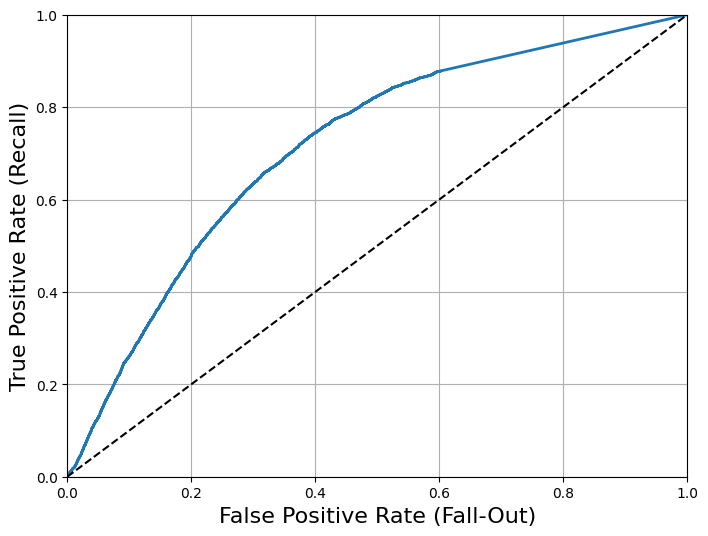

In [78]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_rna, tpr_rna)
#fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
#plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
#plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
#plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
plt.show()